# More on visualisation
## Objectives
* Visualise with pandas
* Visualise with matplotlib
* Visualise with seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

### Visualising with pandas

In [2]:
path = 'large_countries_2015.csv'
df = pd.read_csv(path, index_col=0)

In [3]:
df.head()

,population,fertility,continent
Bangladesh,1.609956e+08,2.12,Asia
Brazil,2.078475e+08,1.78,South America
China,1.376049e+09,1.57,Asia
India,1.311051e+09,2.43,Asia
Indonesia,2.575638e+08,2.28,Asia


---

### Visualise with matplotlib

#### Univariate
* Histogram
* Box plot
* Violin plot

(array([4., 4., 1., 2., 0., 0., 0., 0., 0., 1.]),
 array([1.45 , 1.894, 2.338, 2.782, 3.226, 3.67 , 4.114, 4.558, 5.002,
        5.446, 5.89 ]),
 <a list of 10 Patch objects>)

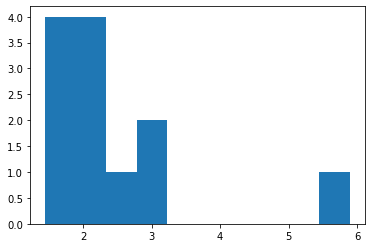

In [4]:
plt.hist(df.fertility)

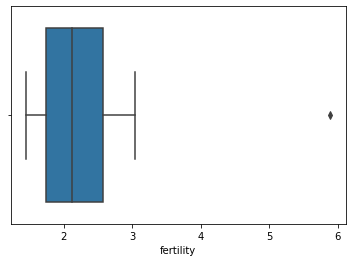

In [5]:
sns.boxplot(df.fertility)

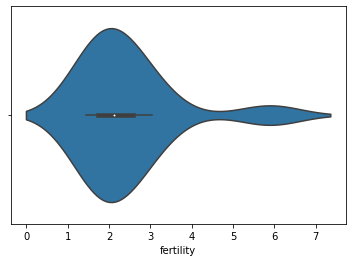

In [6]:
sns.violinplot(df.fertility)

#### Bi/Multiivariate
* Scatter plot
* Joint plot
* Pair plot
* Correlation matrix
### n.b Sometimes Seaborn is much easier to use than matplotlib!

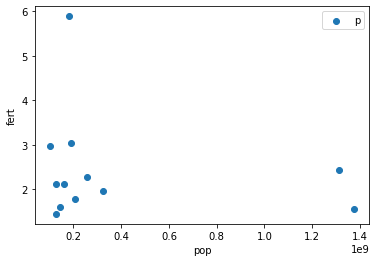

In [7]:
#scatter
plt.scatter(df.population, df.fertility)
plt.xlabel('pop')
plt.ylabel('fert')
plt.legend('pop vs fert')

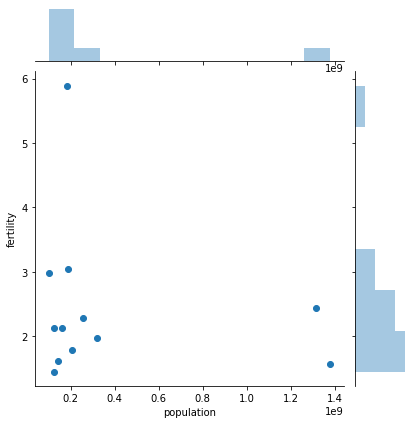

In [8]:
# jointplots can be done in matplotlib, but 
sns.jointplot(x = df.population, y = df.fertility, kind = 'scatter')

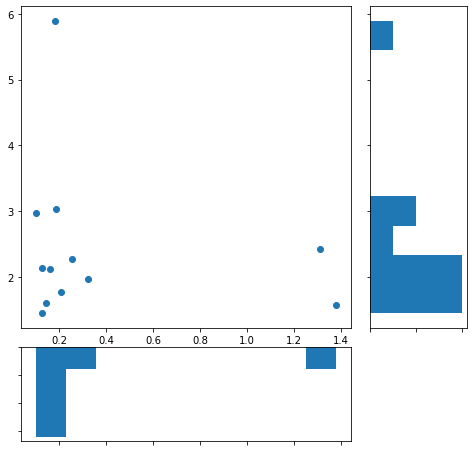

In [9]:
# jointplot in matplotlib
fig = plt.figure(figsize=(8,8))
grid = plt.GridSpec(4, 4)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter(df.population, df.fertility)

# histogram on the right
ax_bottom.hist(df.population)
ax_bottom.invert_yaxis()

# histogram in the bottom
ax_right.hist(df.fertility, orientation='horizontal')

plt.show()

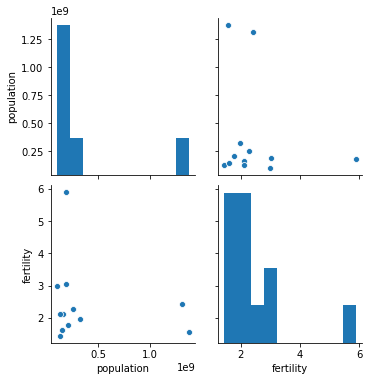

In [10]:
sns.pairplot(df)

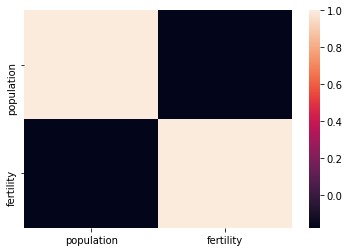

In [11]:
sns.heatmap(df.corr())

#### Comoposition
* Pie chart
* Stacked bar chart

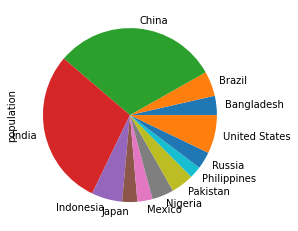

In [12]:
df.population.plot(kind='pie')

---

### Writing an animated visualisation

In [21]:
df = pd.read_excel('gapminder_lifeexpectancy.xlsx')


In [22]:
df.set_index('Life expectancy', inplace=True)

Text(0.5, 1.0, 'Year: 1800, Avg. Life Expectancy: 31.49')

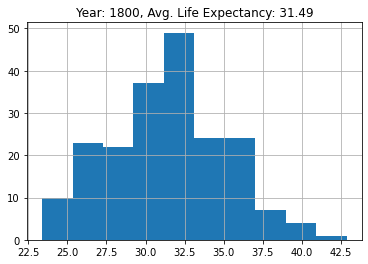

In [23]:
df[1800].hist()
mean_expentancy = round(df[1800].mean(),2)
plt.title(f'Year: {1800}, Avg. Life Expectancy: {mean_expentancy}')

<ipython-input-24-4b2aa6b3fe25>:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


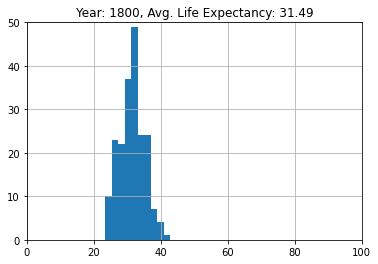

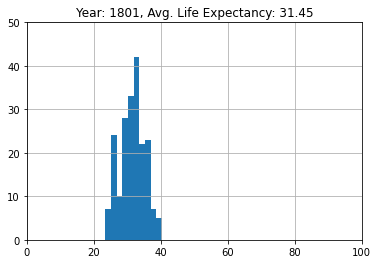

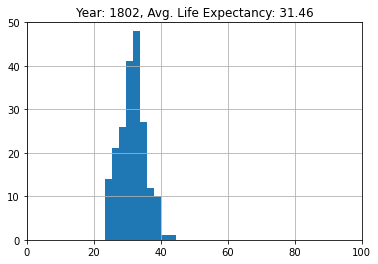

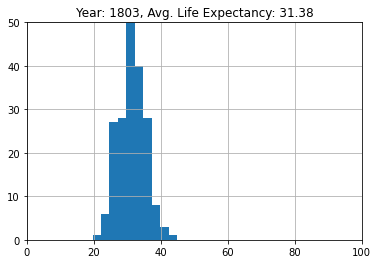

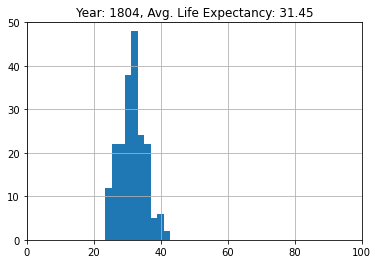

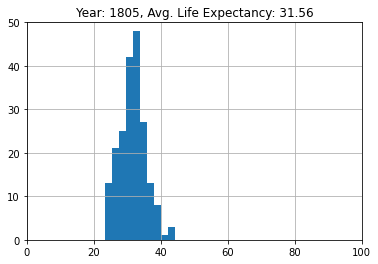

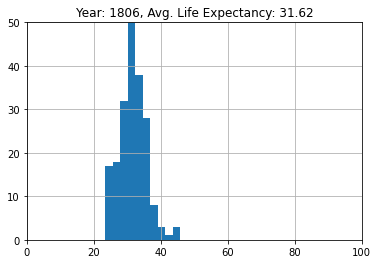

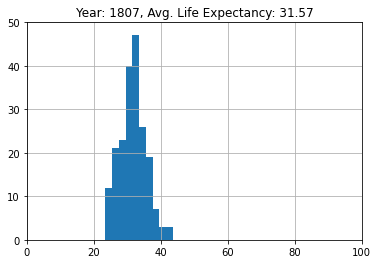

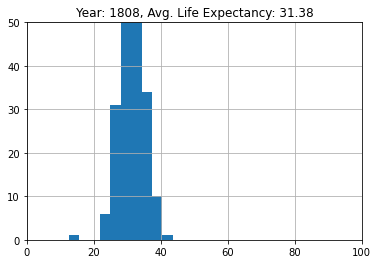

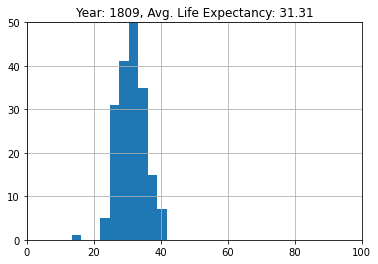

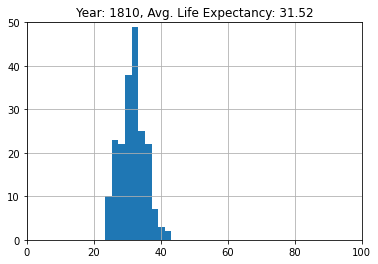

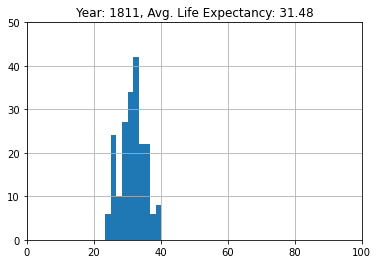

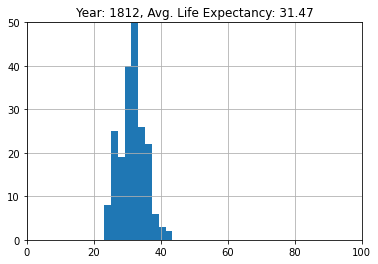

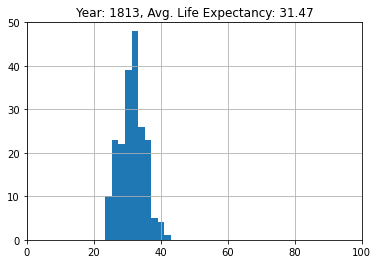

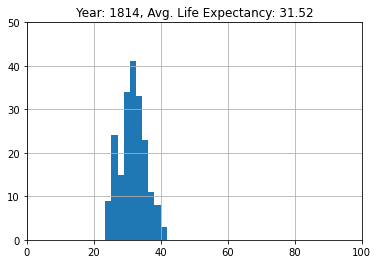

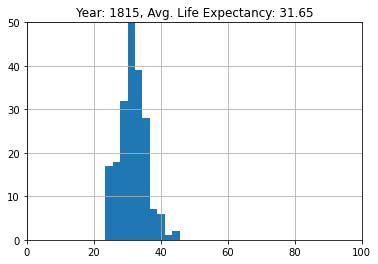

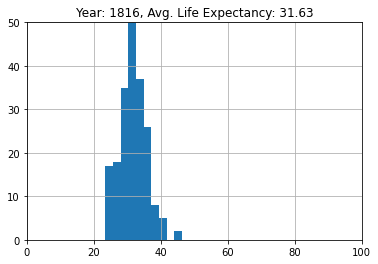

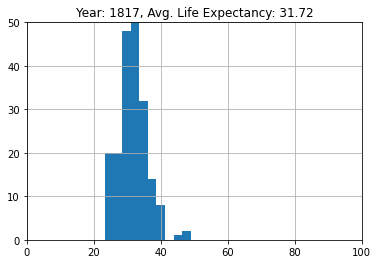

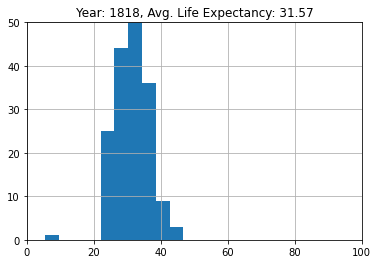

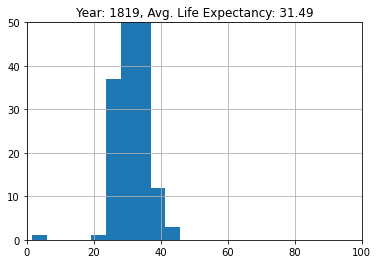

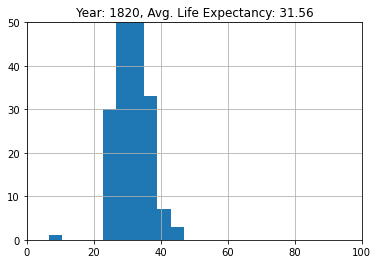

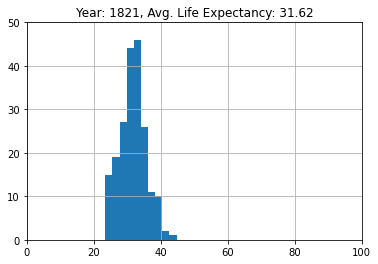

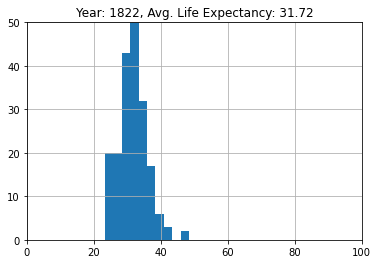

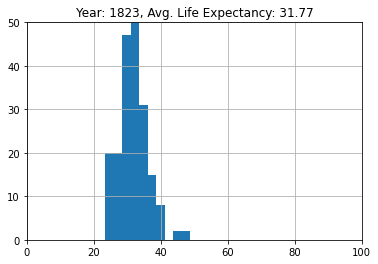

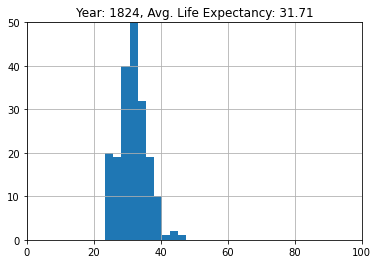

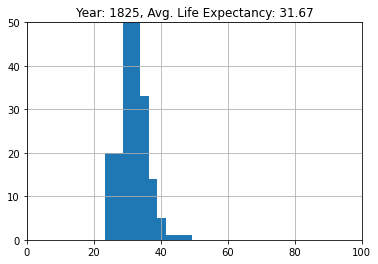

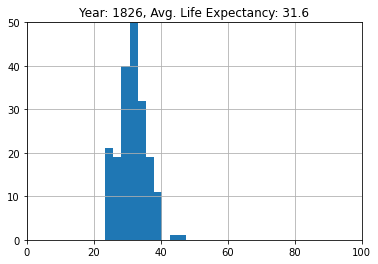

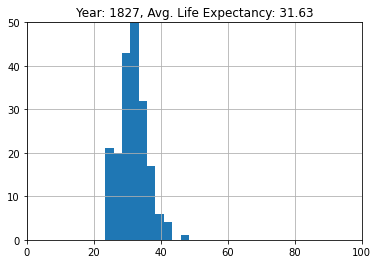

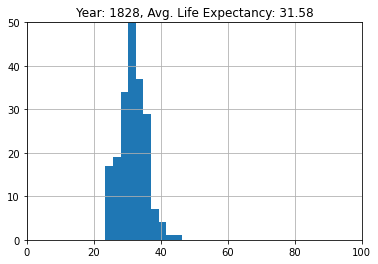

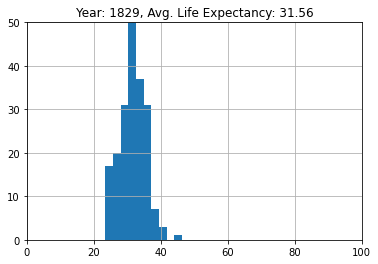

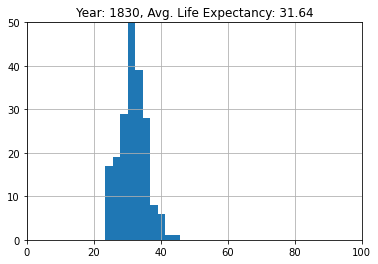

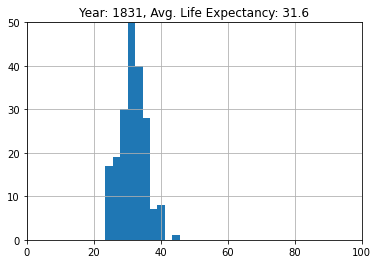

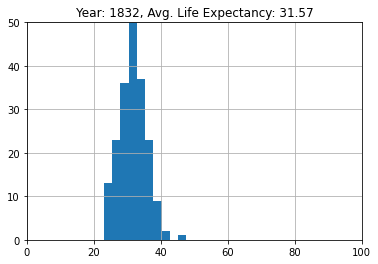

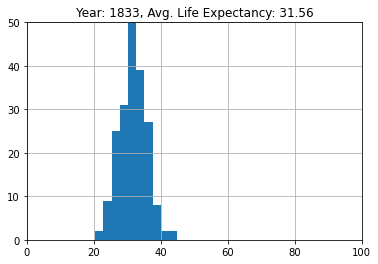

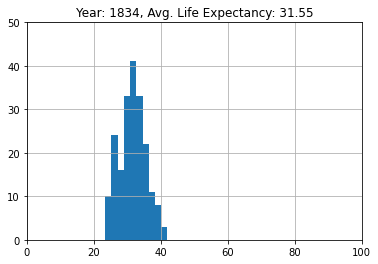

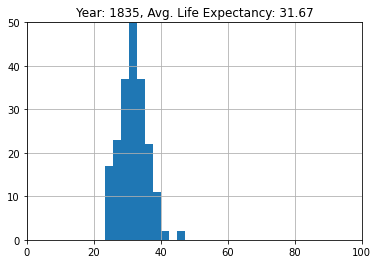

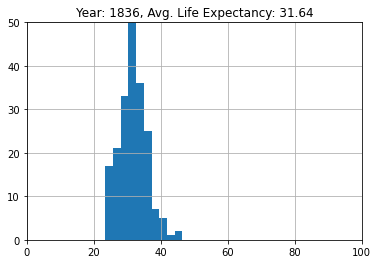

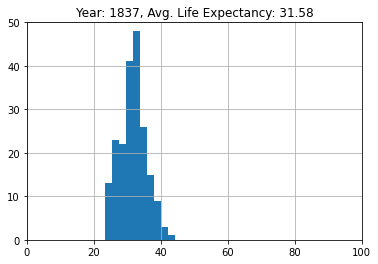

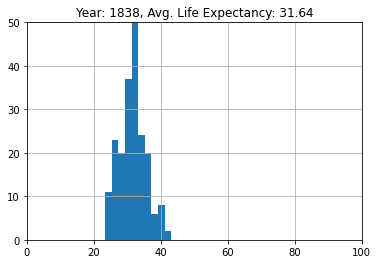

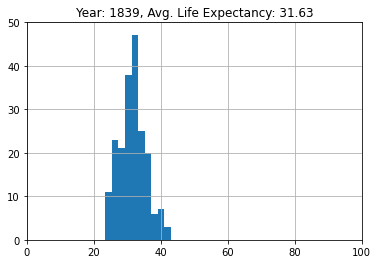

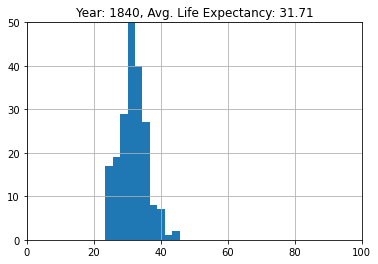

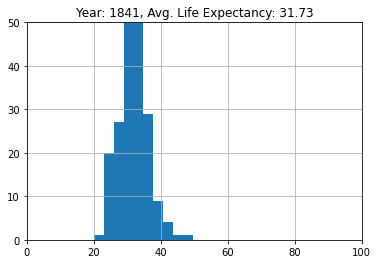

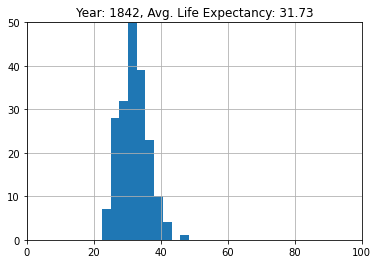

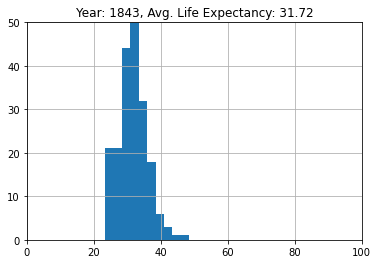

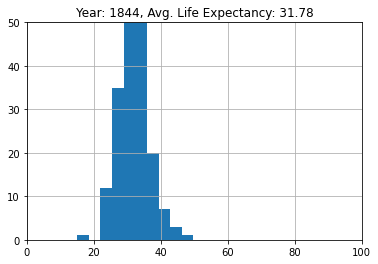

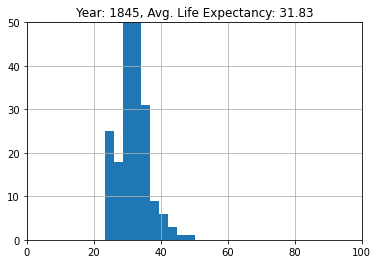

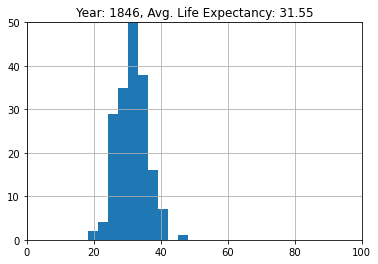

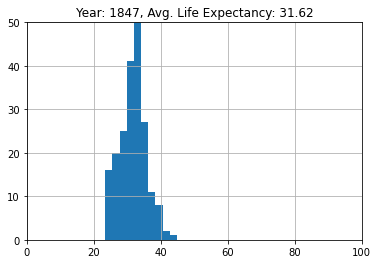

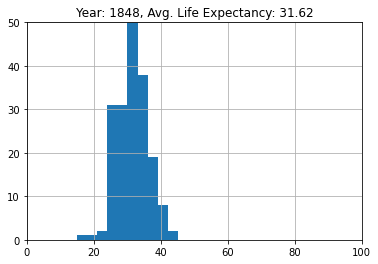

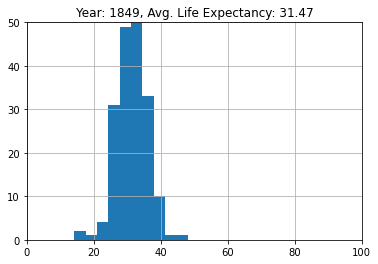

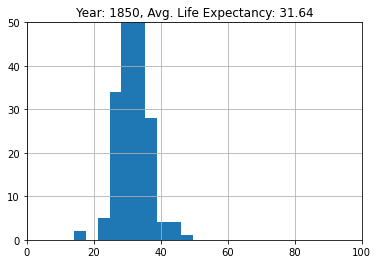

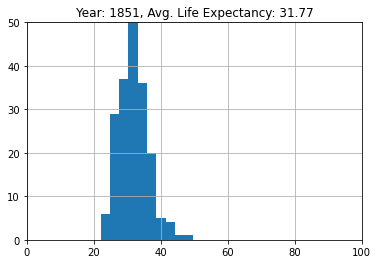

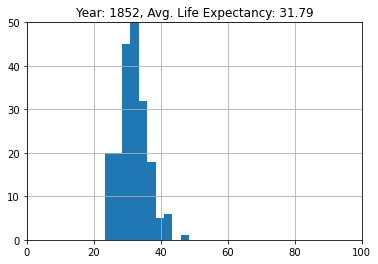

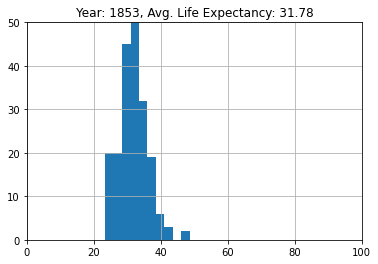

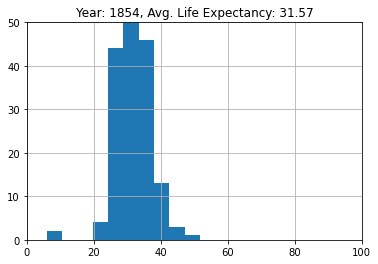

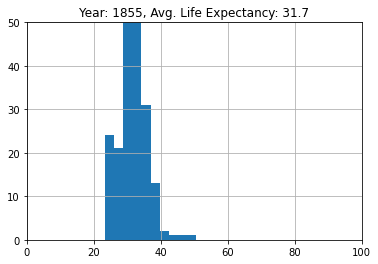

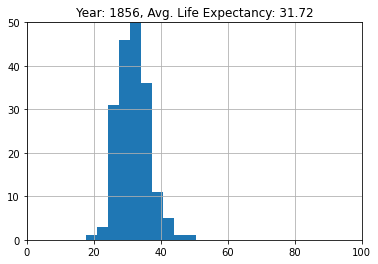

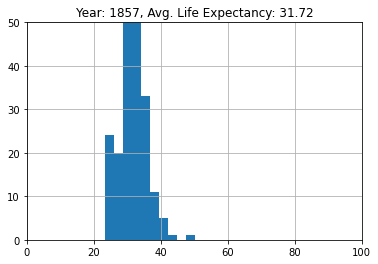

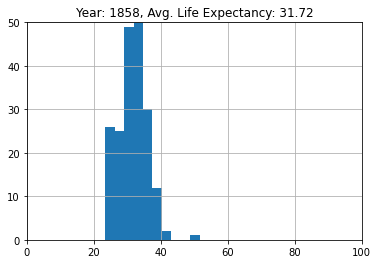

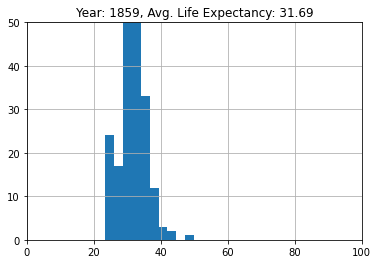

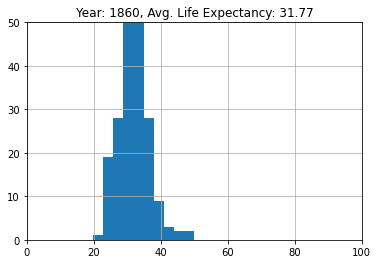

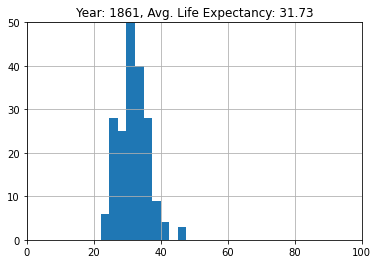

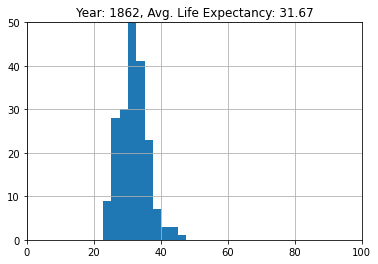

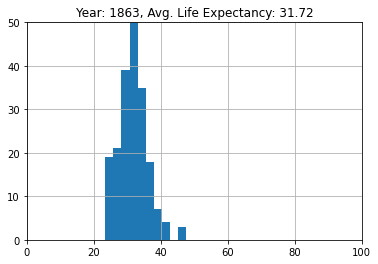

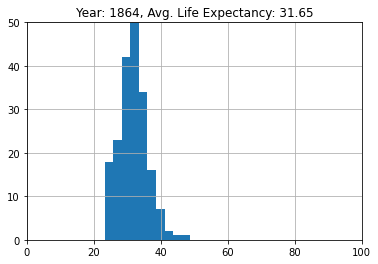

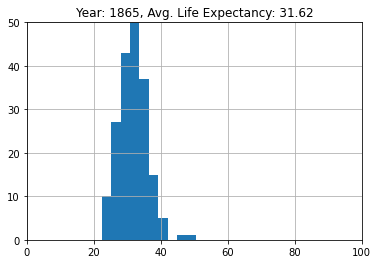

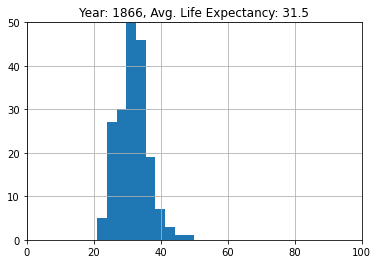

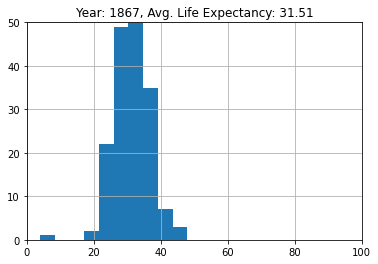

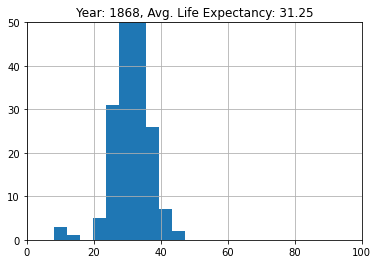

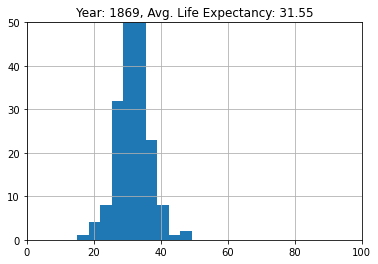

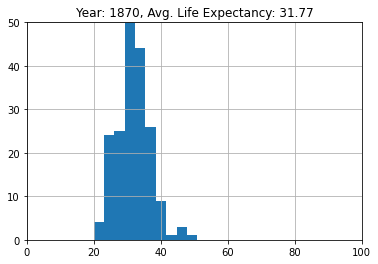

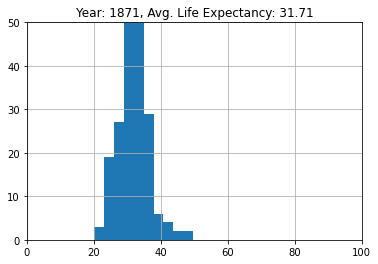

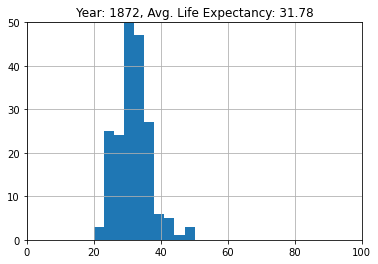

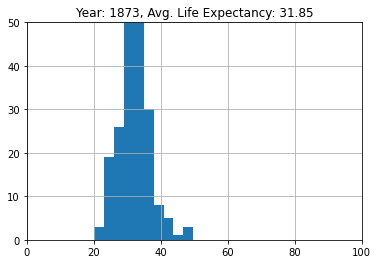

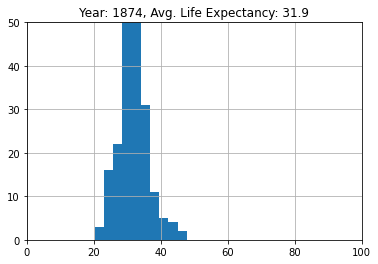

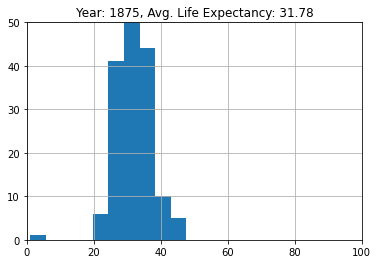

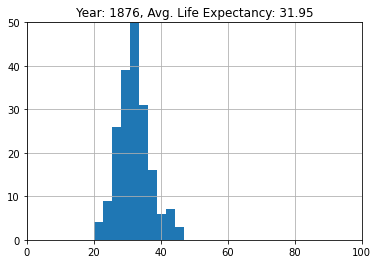

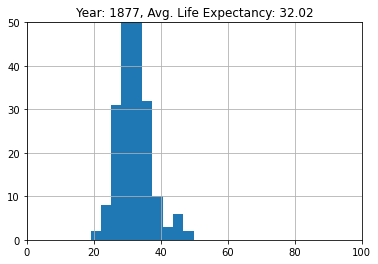

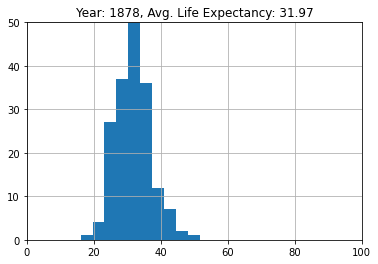

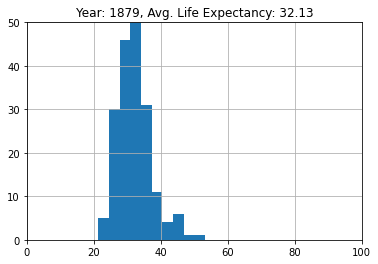

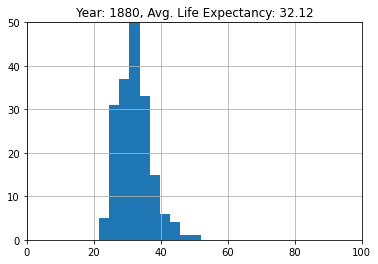

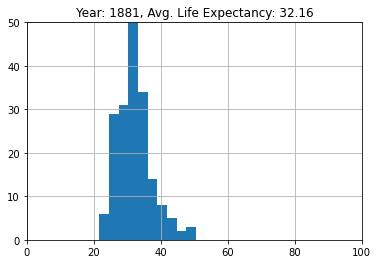

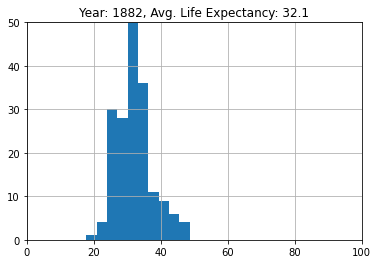

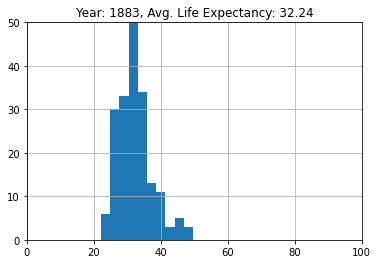

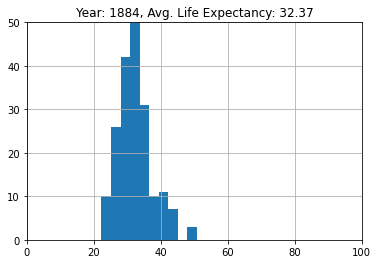

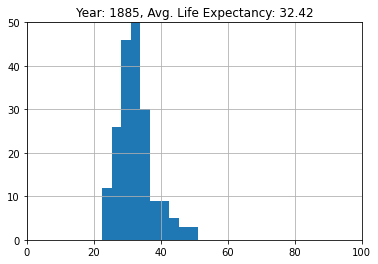

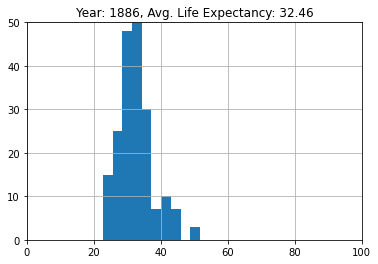

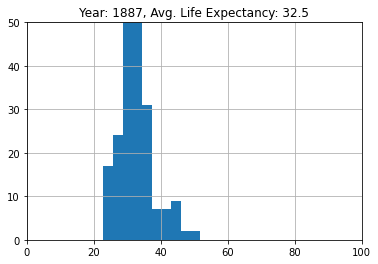

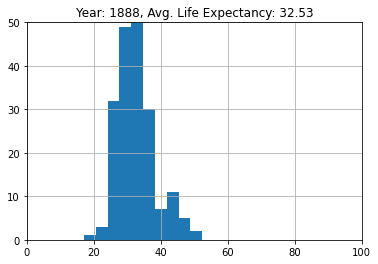

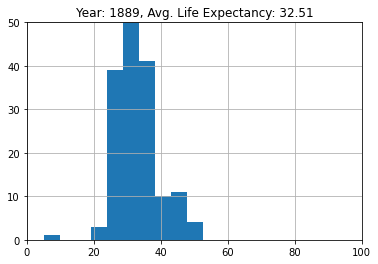

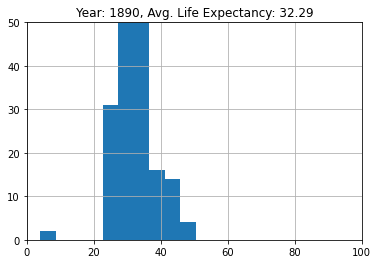

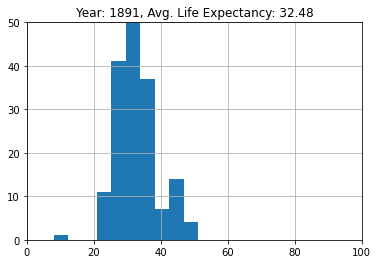

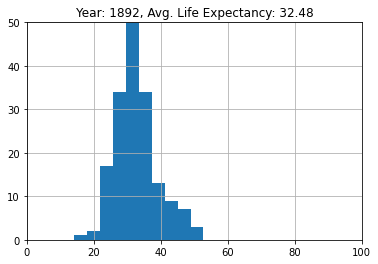

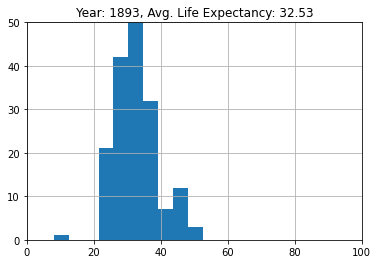

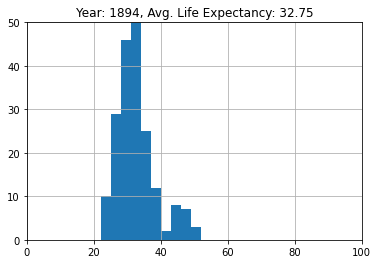

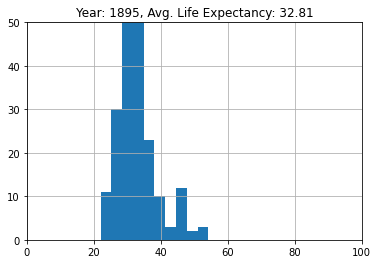

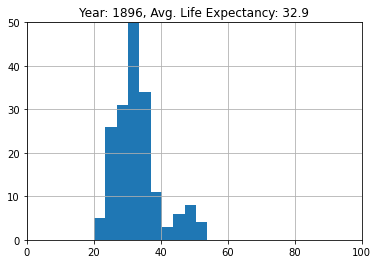

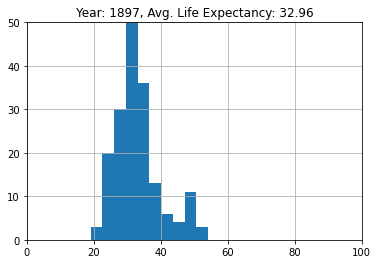

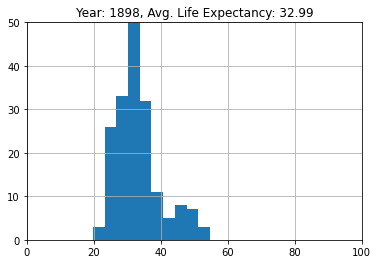

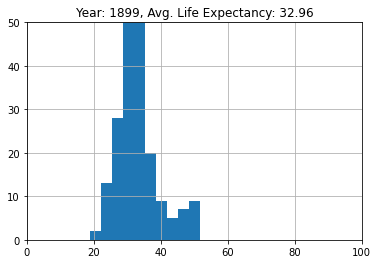

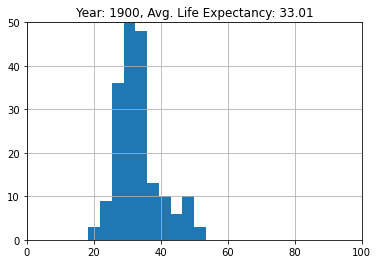

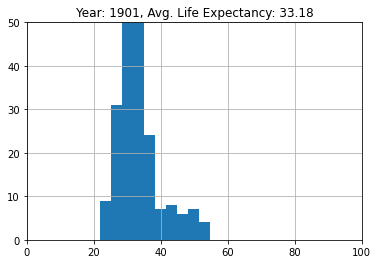

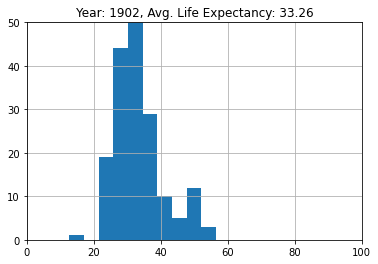

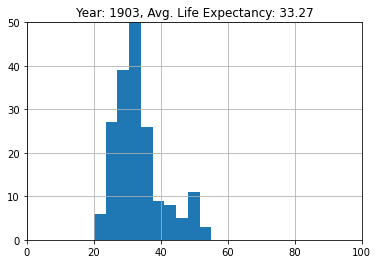

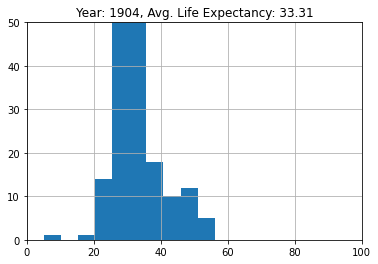

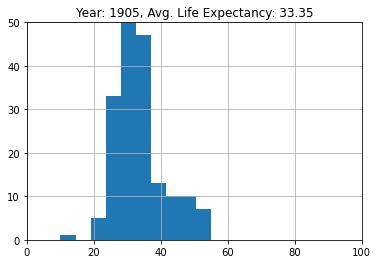

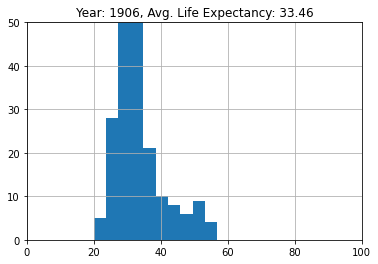

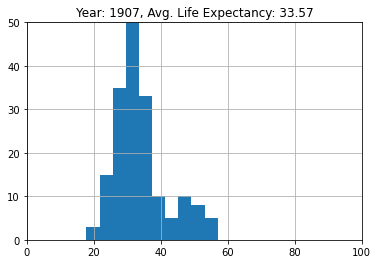

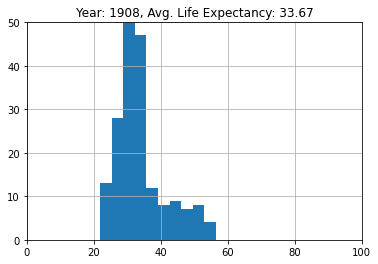

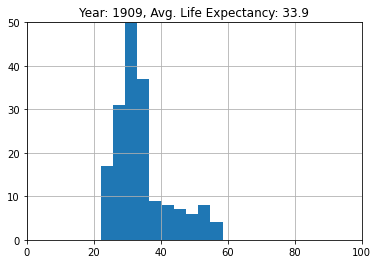

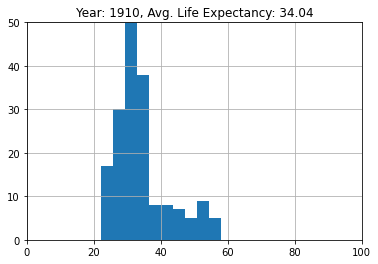

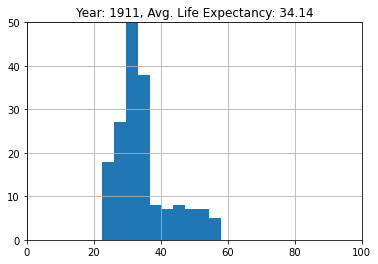

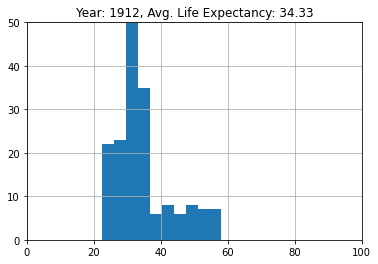

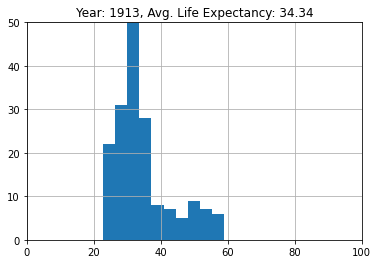

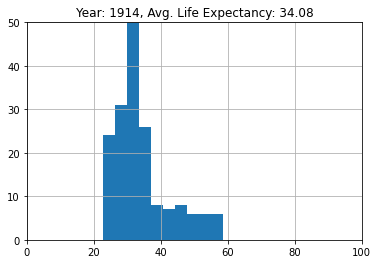

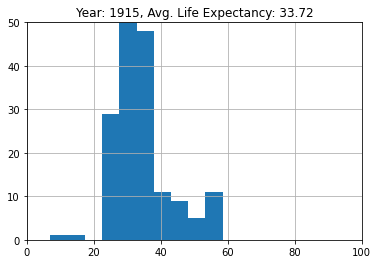

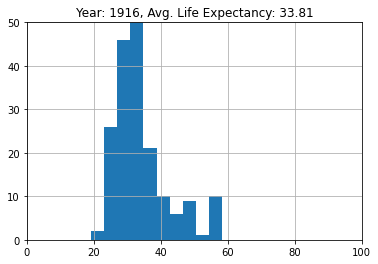

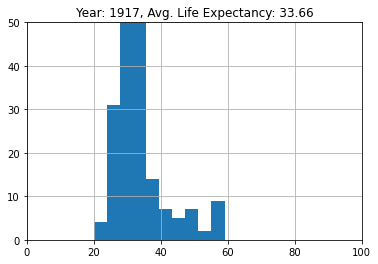

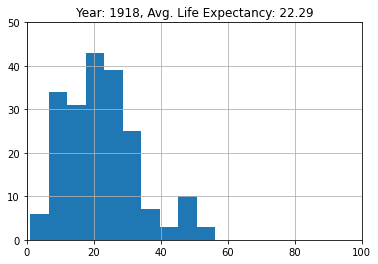

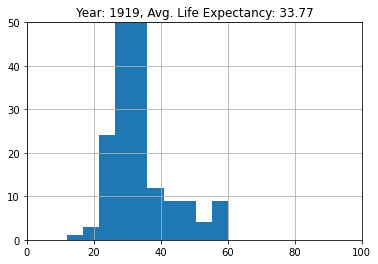

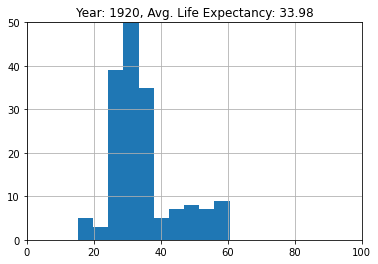

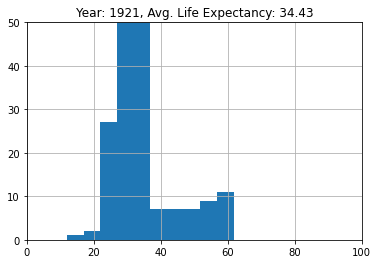

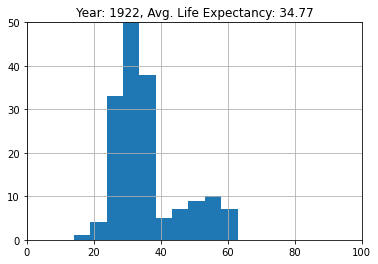

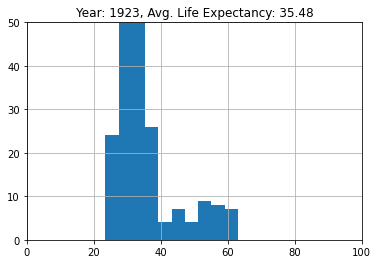

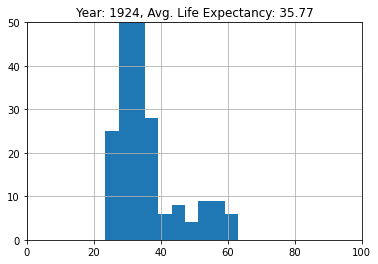

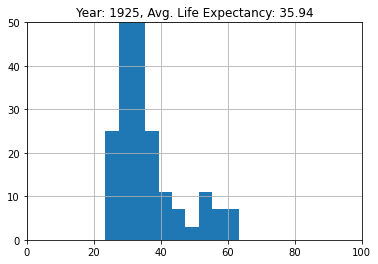

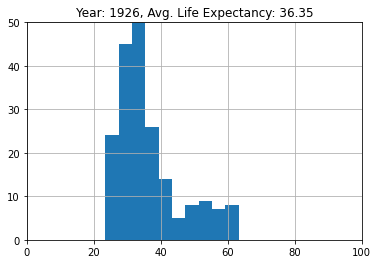

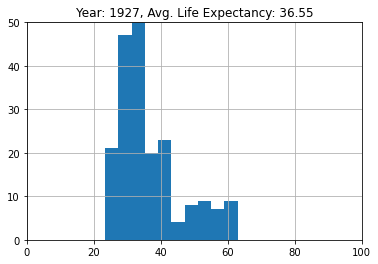

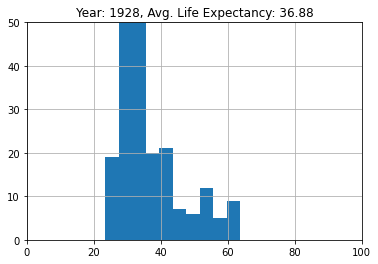

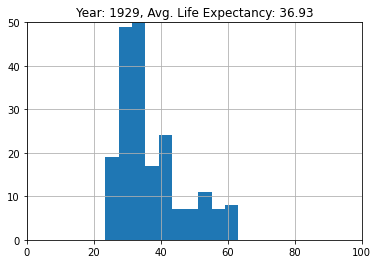

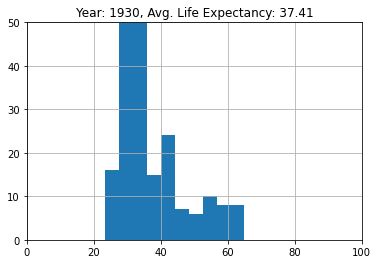

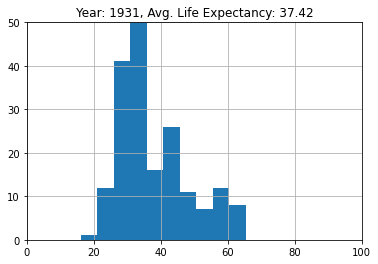

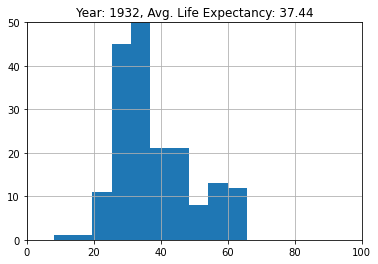

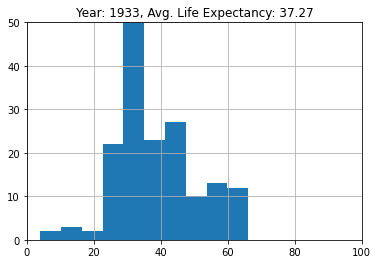

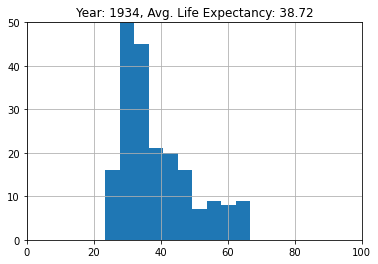

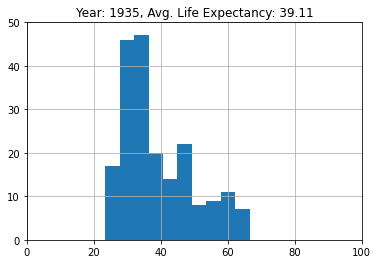

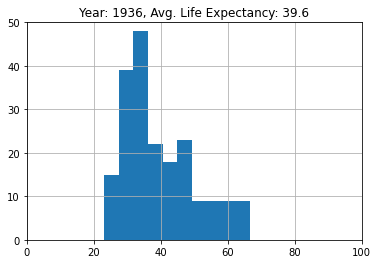

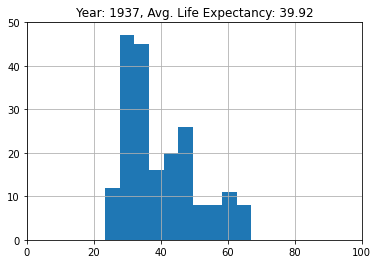

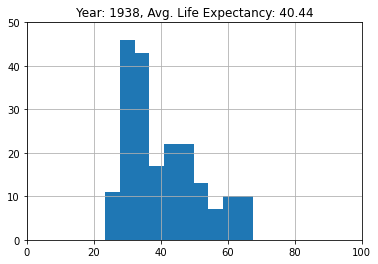

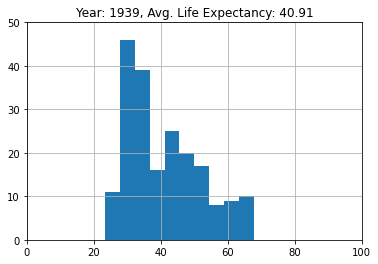

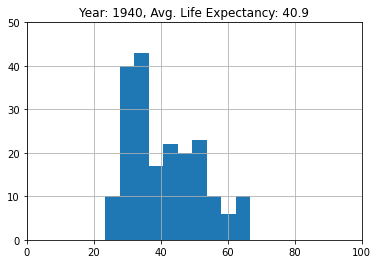

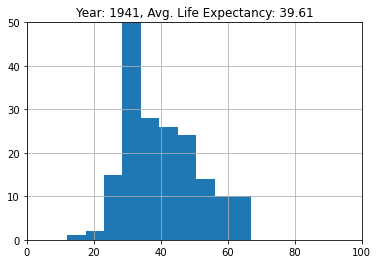

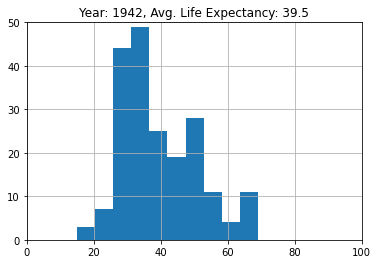

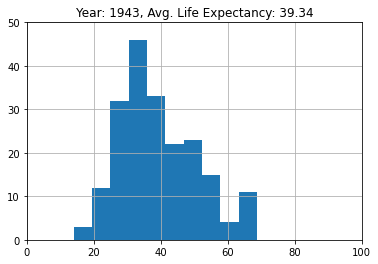

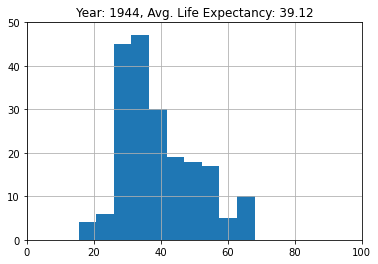

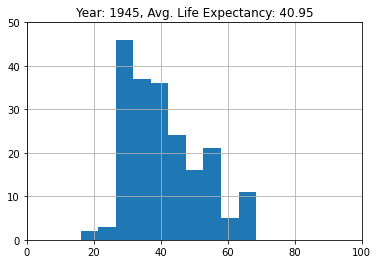

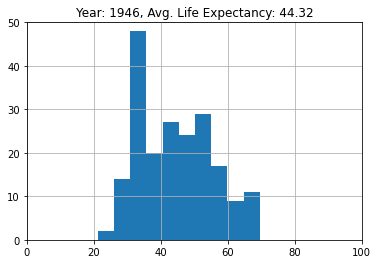

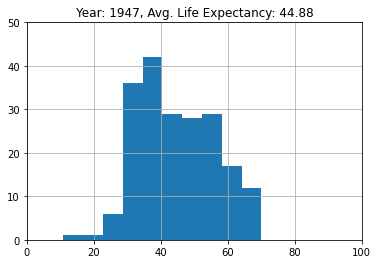

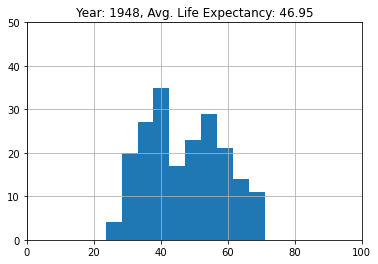

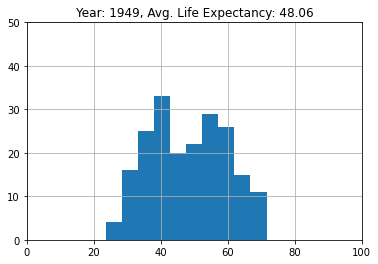

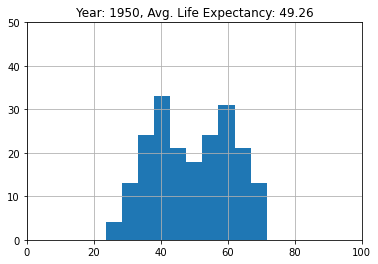

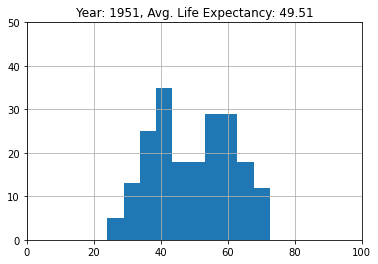

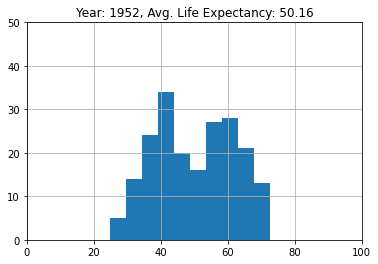

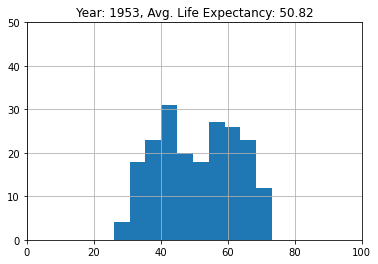

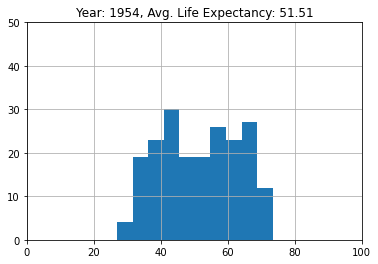

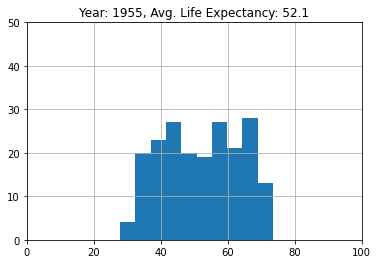

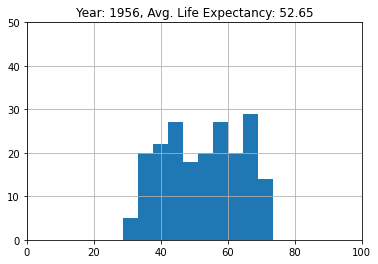

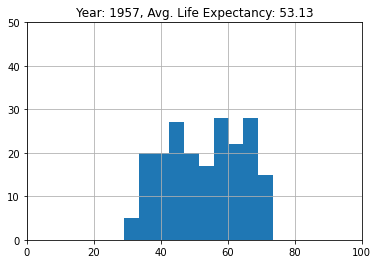

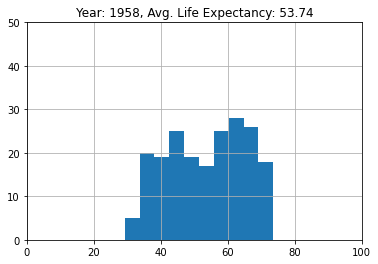

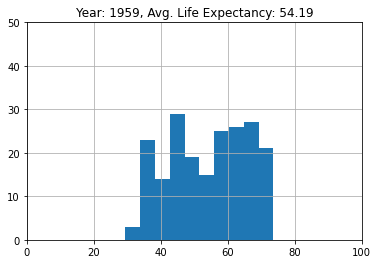

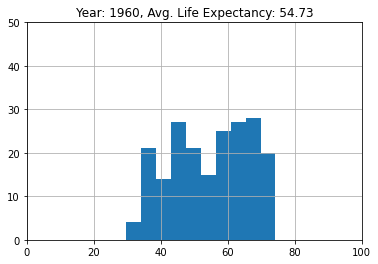

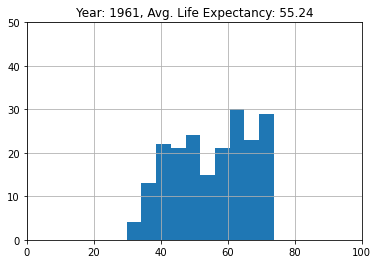

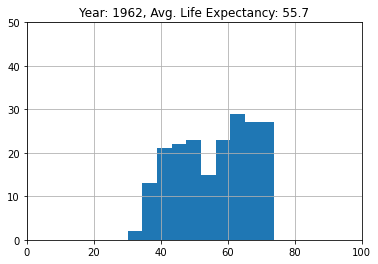

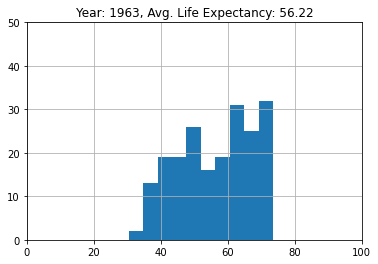

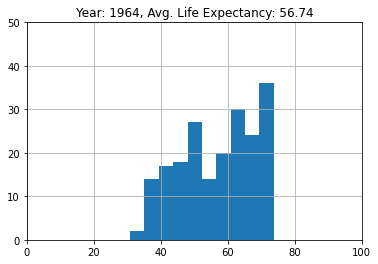

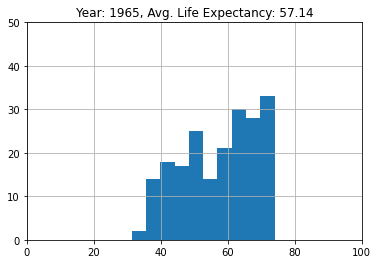

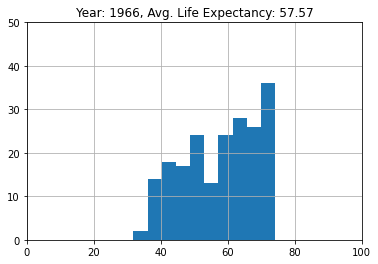

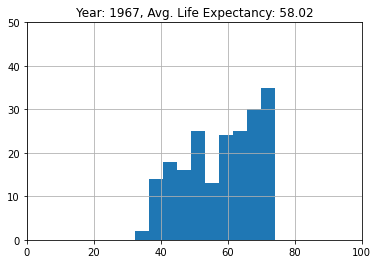

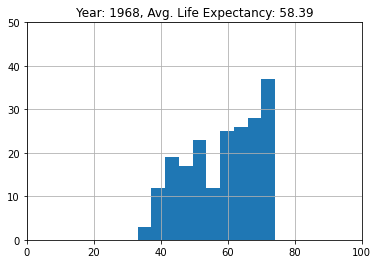

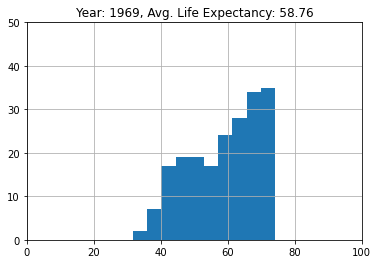

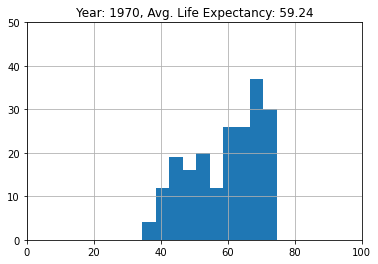

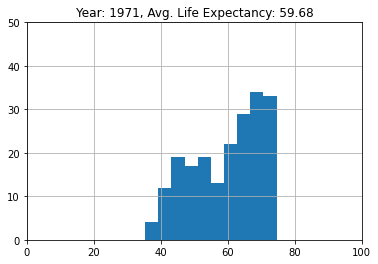

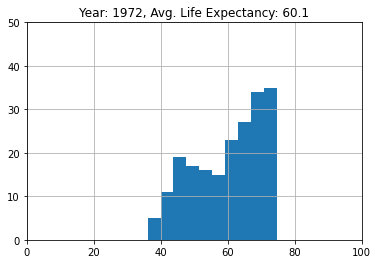

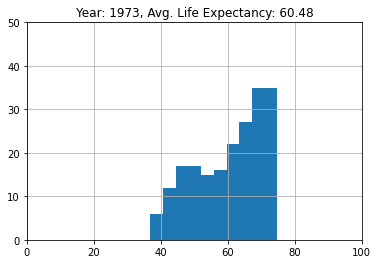

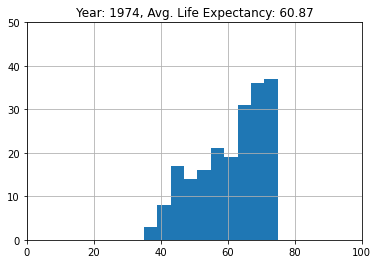

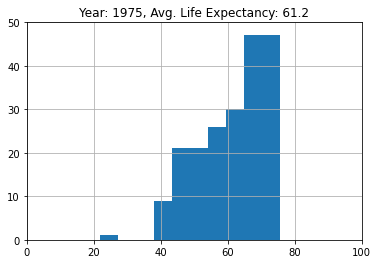

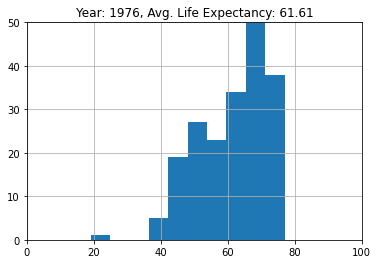

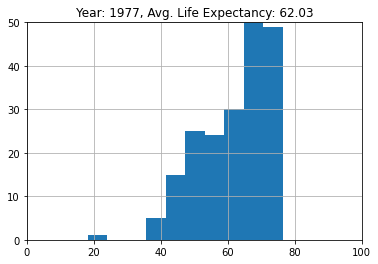

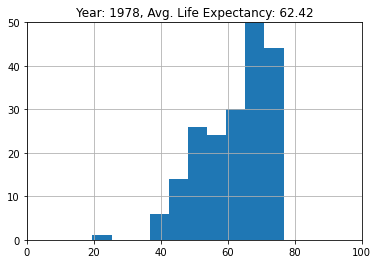

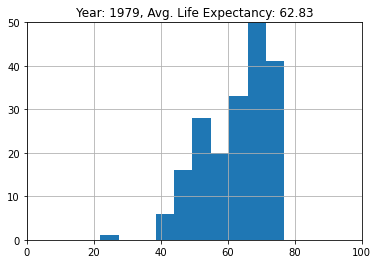

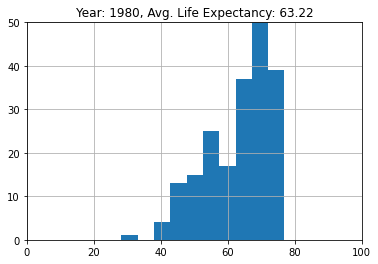

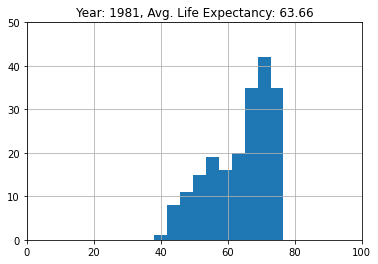

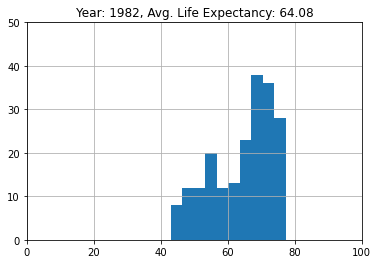

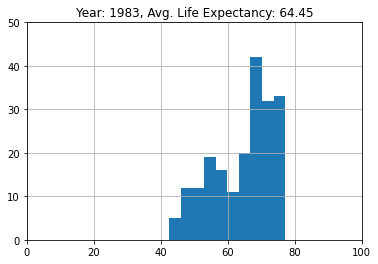

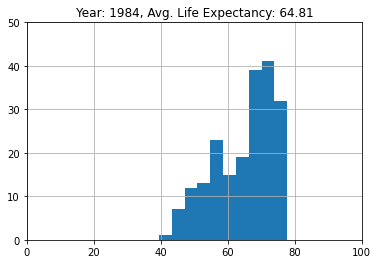

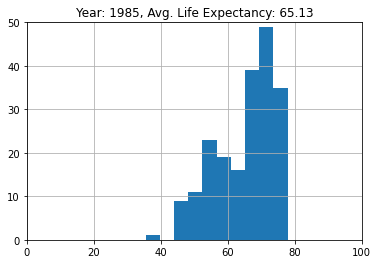

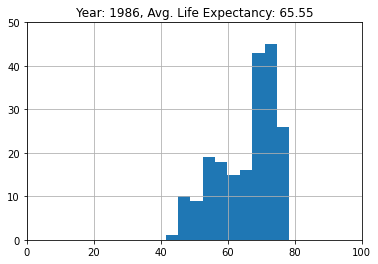

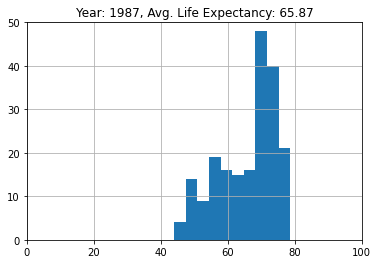

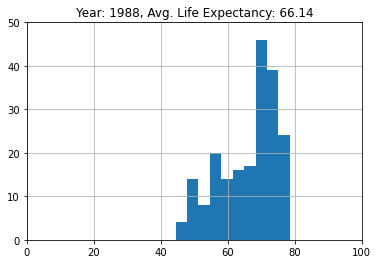

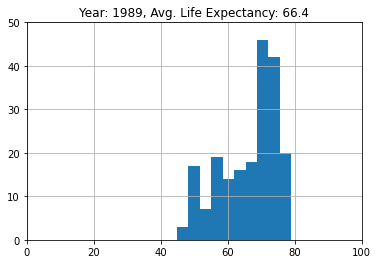

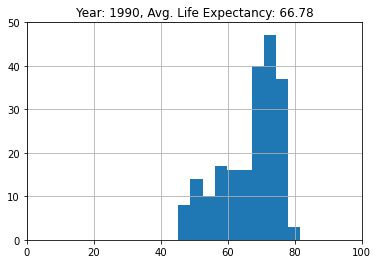

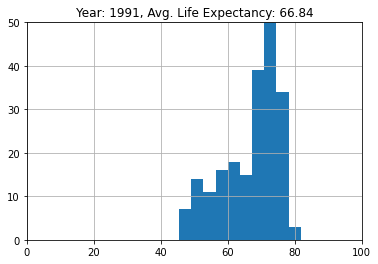

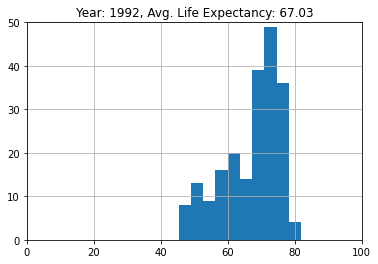

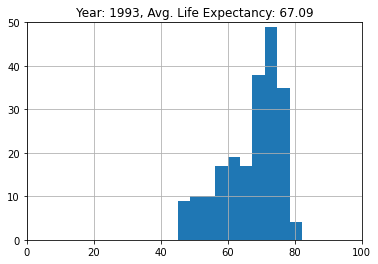

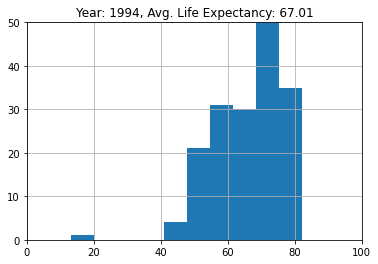

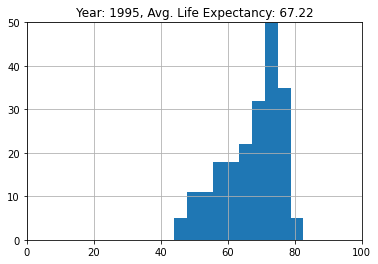

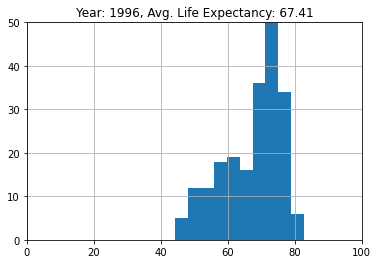

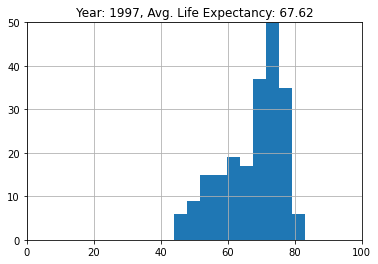

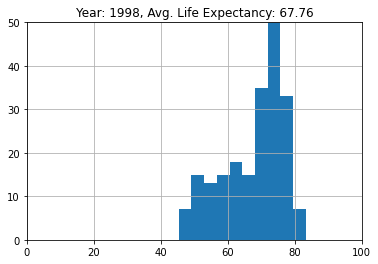

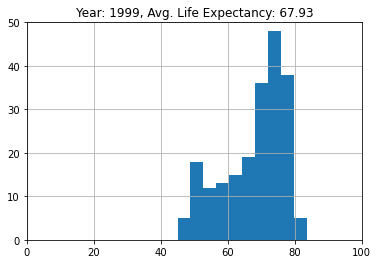

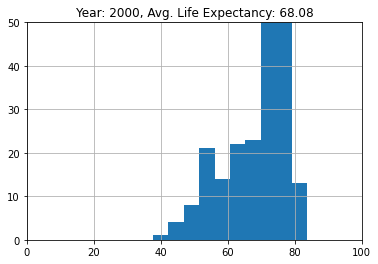

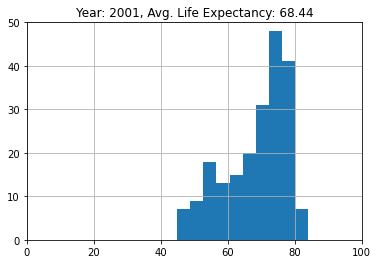

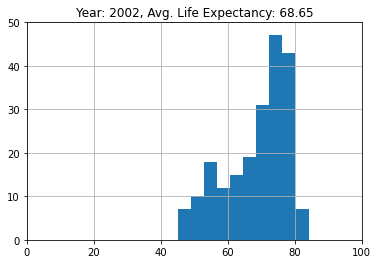

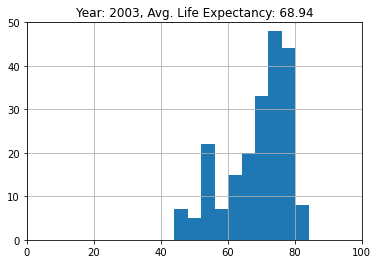

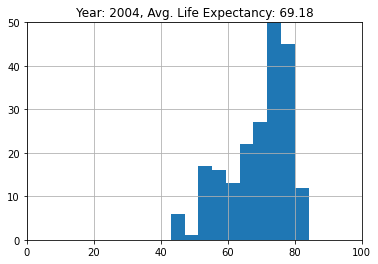

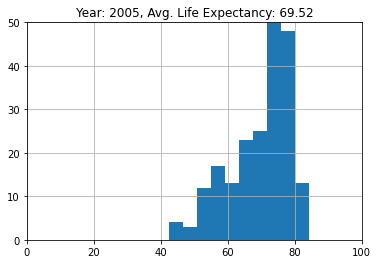

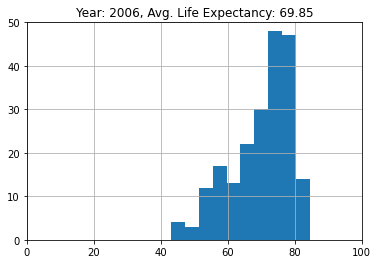

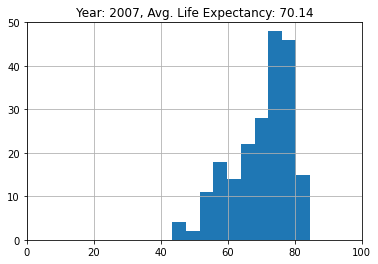

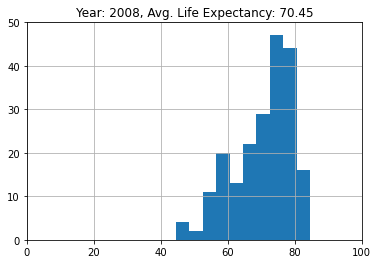

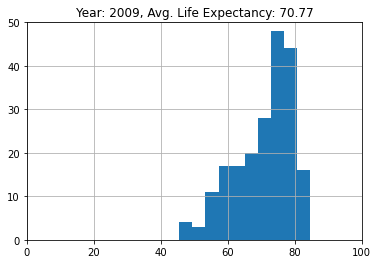

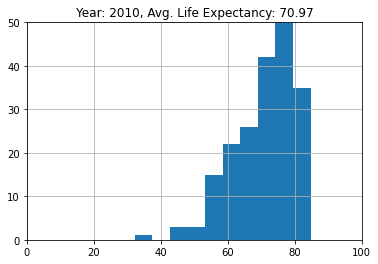

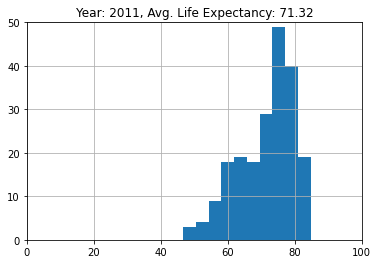

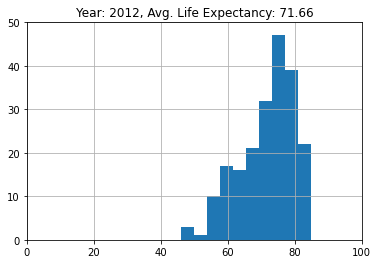

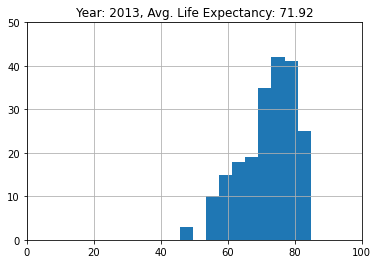

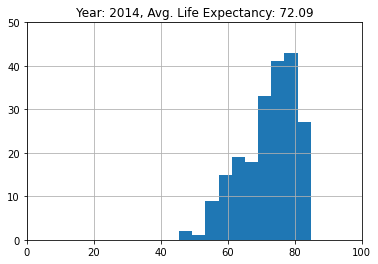

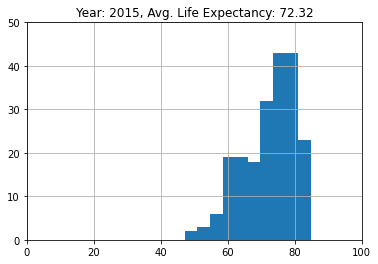

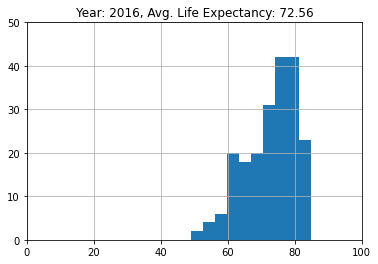

<Figure size 432x288 with 0 Axes>

In [24]:
import imageio
import os

images = []

folder = 'images'

if not os.path.exists(folder
    os.mkdir(folder)

for year in df.columns:
    
    #1. Create histogram plot for each year
    df[year].hist()
    
    #2. Calculate mean fertility rate for each year
    mean_life = df[year].mean()
    
    #3. Add title to plot
    plt.title(f'Year: {year}, Avg. Life Expectancy: {round(mean_life, 2)}')
    
    plt.axis([0, 100, 0, 50])
    
    #4. Save figure with appropriate filename
    filename = f'lifeexp_{year}.png'
    plt.savefig(os.path.join(folder,filename))
    
    #5. Use imageio to read in the image as an array; append to the list
    images.append(imageio.imread(os.path.join(folder,filename)))
    
    #6. Refresh matplotlib
    plt.figure()    
    
imageio.mimsave(os.path.join(folder,'ALL_output.gif'), images, fps=10)